# Procesos estocásticos

Construyendo procesos estocásticos

## Procesos puramente aleatorios

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate

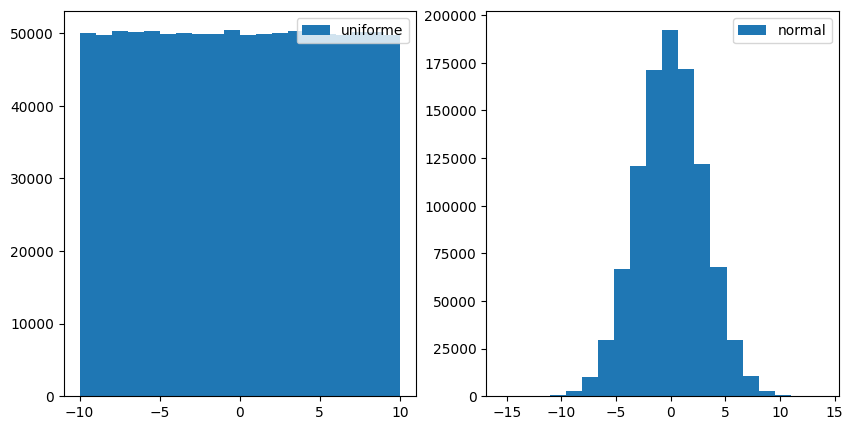

In [16]:
# creamos un objeto generador
gen = np.random.default_rng()
# generamos una tira de numeros uniformes al azar
n = 1000000
x = gen.uniform(-10,10, size = n)
# generamos una tira de numeros nurmalmente distribuidos 
y = gen.normal(0,3, size = n)

# hacemos unos histogramas y ploteamos
fig, axs = plt.subplots(1,2, figsize = (10,5))
axs[0].hist(x, bins = 20, label = 'uniforme')
axs[0].legend()
axs[1].hist(y, bins = 20, label = 'normal')
axs[1].legend()
plt.show()

In [17]:
# observando la media, la varianza y la autocorrelacion
ws = 10000 # subventana para calcular
x_mean = [x[i*ws:(i+1)*ws].mean() for i in range(n//ws)]
y_mean = [y[i*ws:(i+1)*ws].mean() for i in range(n//ws)]
x_var = [x[i*ws:(i+1)*ws].std()**2 for i in range(n//ws)]
y_var = [y[i*ws:(i+1)*ws].std()**2 for i in range(n//ws)]
x_corr = correlate(x, x, mode = 'same')[n//2:]
x_corr /= x_corr[0]
y_corr = correlate(x, x, mode = 'same')[n//2:]
y_corr /= y_corr[0]

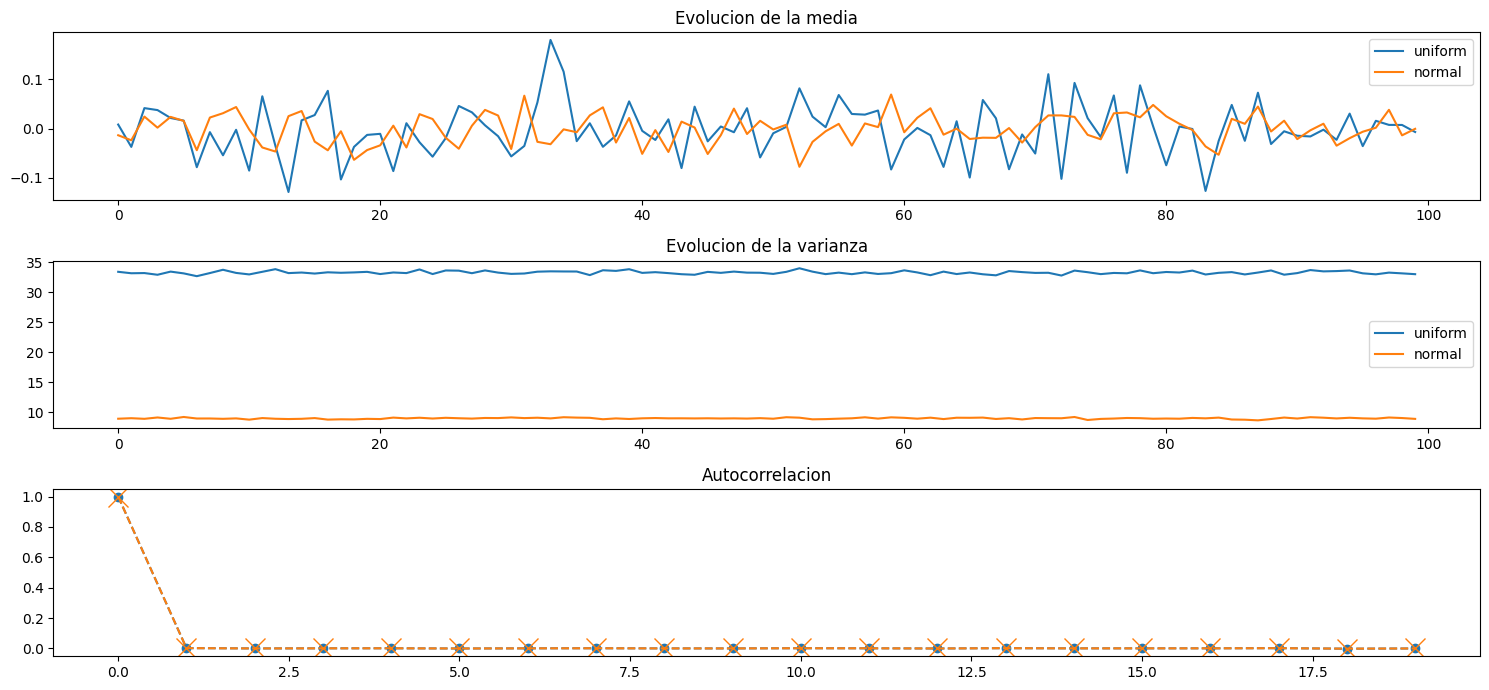

In [18]:
fig, axs = plt.subplots(3,1, figsize = (15,7))
axs[0].set_title('Evolucion de la media')
axs[0].plot(x_mean, label = 'uniform')
axs[0].plot(y_mean, label = 'normal')
axs[0].legend()
axs[1].set_title('Evolucion de la varianza')
axs[1].plot(x_var, label = 'uniform')
axs[1].plot(y_var, label = 'normal')
axs[1].legend()
axs[2].set_title('Autocorrelacion')
axs[2].plot(x_corr[:20], 'o--', label = 'uniform')
axs[2].plot(y_corr[:20], 'x--', label = 'normal', ms=15)
fig.tight_layout()

## Caminata aleatoria

Para poder estimar cómo evolucionan los valores esperados o momentos de la distribución, hay que simular muchas caminatas aleatorias

In [28]:
def random_walk(prev, gen):
    return prev + gen(1,1)

gen = np.random.default_rng()
n_walkers = 1000
steps = 10000
ws = 200 # subventana para calcular
# hacemos caminar a todos los caminadores y cada ws pasos guardamos la posición
pos = np.zeros(steps//ws)
for w in range(n_walkers):
    x = [0]
    partial = []
    for i in range(steps):
        x.append(random_walk(x[-1], gen.normal))
        if i%ws == 0:
            partial.append(x[-1])
    pos = np.vstack([pos,partial])

print(pos.shape)

mean = np.mean(pos, axis=0)
var = np.var(pos, axis=0)
# x_mean = [x[i*ws:(i+1)*ws].mean() for i in range(steps//ws)]
# x_var = [x[i*ws:(i+1)*ws].std()**2 for i in range(steps//ws)]
# x_corr = correlate(x, x, mode = 'same')[steps//2:]
# x_corr /= x_corr[0]

(1001, 50)


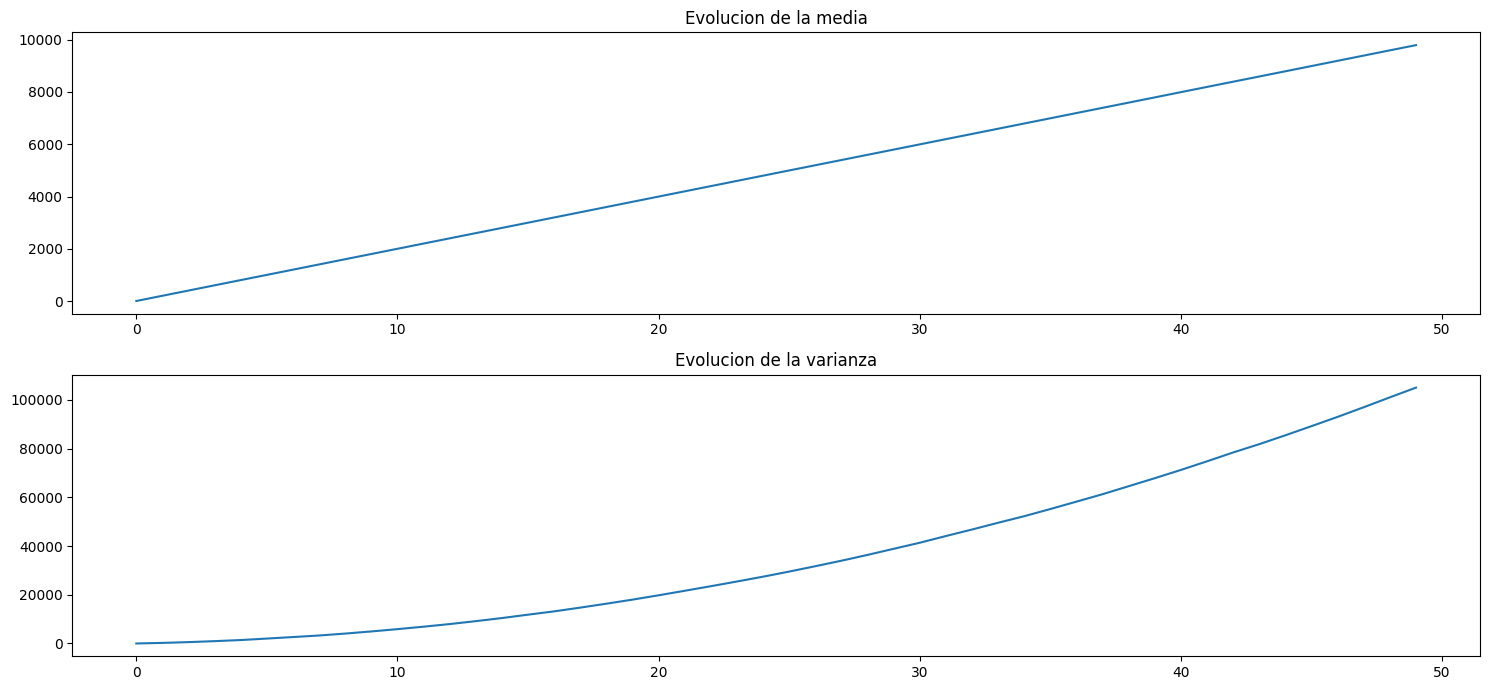

In [30]:
fig, axs = plt.subplots(2,1, figsize = (15,7))
axs[0].set_title('Evolucion de la media')
axs[0].plot(mean)
axs[1].set_title('Evolucion de la varianza')
axs[1].plot(var)
fig.tight_layout()

## Procesos de media movil

In [21]:
def MA(q:int, beta:list, gen):
    

SyntaxError: incomplete input (4149038769.py, line 2)